In [31]:
import pandas as pd
from matplotlib import pyplot as plt

In [32]:
import numpy as np

In [68]:
df = pd.read_csv('prop_exp2.csv').iloc[:, :4]
df.columns = ['T', 'F1', 'F2', 'F']
df

,T,F1,F2,F
0,0.000,-0.546890,-0.412147,0.959038
1,0.005,-0.548988,-0.420563,0.969551
2,0.010,-0.540604,-0.420563,0.961166
3,0.015,-0.534325,-0.422661,0.956985
4,0.020,-0.540604,-0.418457,0.959061
...,...,...,...,...
2515,12.575,-0.031433,-0.082008,0.113442
2516,12.580,-0.035622,-0.088318,0.123939
2517,12.585,-0.027237,-0.079910,0.107147
2518,12.590,-0.029335,-0.079910,0.109245


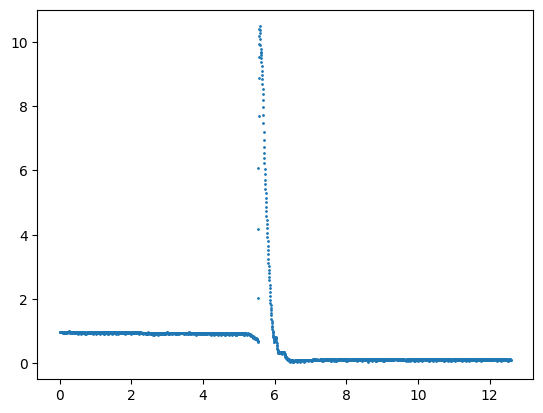

In [69]:
plt.scatter(df['T'], df['F'], s=1)
# plt.xlim(0.31, 1.25)
plt.show()

In [70]:
def find_bg(df, ts, te):
    df = df.copy()
    df = df[(df['T'] >= ts) & (df['T'] <= te)]
    # df['bg'] = df['F'].rolling(window=100).mean()
    return df['F'].mean()

In [71]:
def find_br(df_n, tp):
    st = df_n[(df_n['T'] < tp) & (df_n['F'] < 0)].index[-1]
    en = df_n[(df_n['T'] > tp) & (df_n['F'] < 0)].index[0]
    return st, en

In [72]:
find_bg(df, 0, 4)#.plot(x='T', y='bg')

0.9463593032459426

In [73]:
df_norm = df.copy()
df_norm['F'] -= find_bg(df, 0, 4)

In [74]:
find_br(df_norm, 5.9)

(1106, 1190)

In [75]:
df_crop = df.copy()
df_crop = df_crop.iloc[find_br(df_norm, 5.9)[0]:find_br(df_norm, 5.9)[1]]

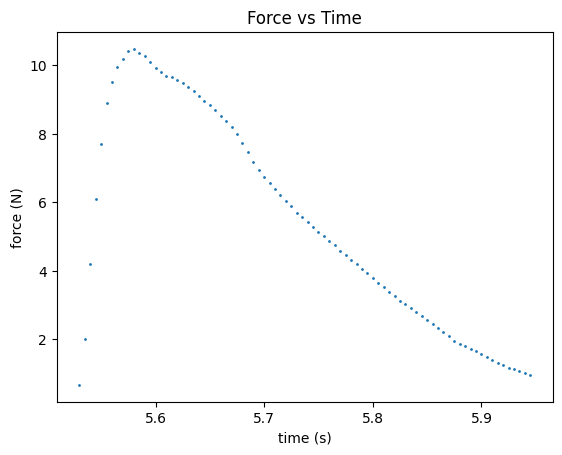

In [76]:
plt.scatter(df_crop['T'], df_crop['F'], s=1)
plt.xlabel("time (s)")
plt.ylabel("force (N)")
plt.title("Force vs Time")

plt.show()

In [77]:
df_crop["F"] -= df_crop.sort_values('F', ascending=True).iloc[0, 3]
df_crop["F"]

1106    0.000000
1107    1.352234
1108    3.521233
1109    5.415932
1110    7.021050
          ...   
1185    0.500511
1186    0.454330
1187    0.397621
1188    0.340889
1189    0.300972
Name: F, Length: 84, dtype: float64

In [78]:
df_crop.sort_values('T', ascending=True).iloc[0, 0]

5.53

In [79]:
df_crop["T"] -= df_crop.sort_values('T', ascending=True).iloc[0, 0]
df_crop["T"]

1106    0.000
1107    0.005
1108    0.010
1109    0.015
1110    0.020
        ...  
1185    0.395
1186    0.400
1187    0.405
1188    0.410
1189    0.415
Name: T, Length: 84, dtype: float64

In [80]:
df_crop = df_crop[["T", "F"]]

In [ ]:
df_crop.to_csv('F_prop.csv', index=False)

In [47]:
df_inter = df_crop[["T", "F"]]
# df_inter[df_inter["T"] == 0.323]["F"] = pd.NA
df_inter.loc[-1] = [.323, pd.NA]
print(df_inter)
print(df_inter[df_inter["T"] == 0.323])
df_inter = df_inter.set_index('T').interpolate(method='linear').reset_index()
df_inter[df_inter["T"] == 0.323]

           T         F
 1079  0.000  0.000000
 1080  0.005  0.502586
 1081  0.010  1.747421
 1082  0.015  4.034279
 1083  0.020  5.477448
...      ...       ...
 1222  0.715  0.382668
 1223  0.720  0.344879
 1224  0.725  0.302879
 1225  0.730  0.292397
-1     0.323       NaN

[148 rows x 2 columns]
        T   F
-1  0.323 NaN


C:\Users\levta\AppData\Local\Temp\ipykernel_2052\1786107588.py:3: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_inter.loc[-1] = [.323, pd.NA]


,T,F
147,0.323,0.292397


<Axes: xlabel='T'>

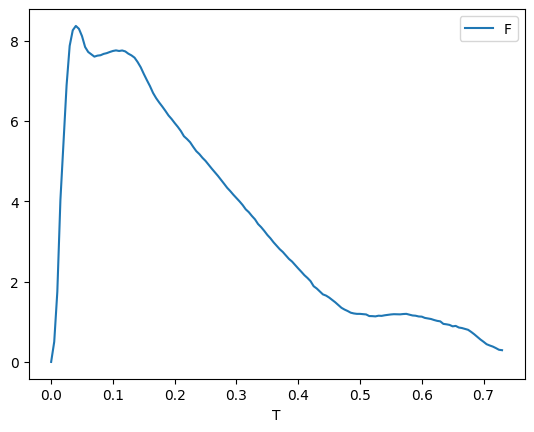

In [48]:
df_crop[["T", "F"]].plot(x='T', y='F')

In [49]:
df_res = df_crop[["T", "F"]]
df_res.reset_index(drop=True, inplace=True)
df_res

,T,F
0,0.000,0.000000
1,0.005,0.502586
2,0.010,1.747421
3,0.015,4.034279
4,0.020,5.477448
...,...,...
142,0.710,0.409935
143,0.715,0.382668
144,0.720,0.344879
145,0.725,0.302879


In [50]:
df_res.to_csv("F_prop.csv", index=False)

In [51]:
df_inter.to_csv('F_prop.csv', index=False)

<Axes: xlabel='T'>

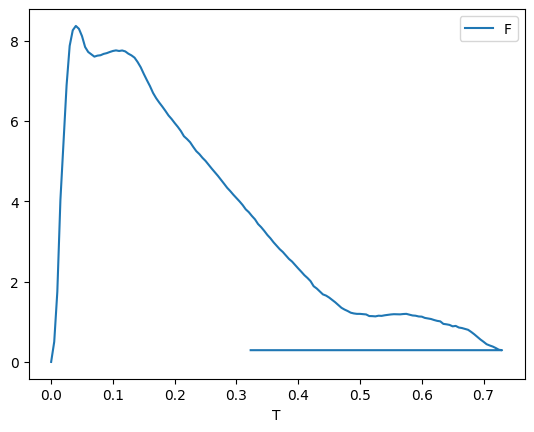

In [52]:
df_inter.plot(x='T', y='F')

In [53]:
df_inter = df_crop[["T", "F"]]
df_inter.append({"T": 0.323, "F": pd.NA}, ignore_index=True)
print(df_inter.set_index('T').interpolate(method='linear')[df_inter['T'] == 0.323])

AttributeError: 'DataFrame' object has no attribute 'append'

Series([], Name: F, dtype: float64)
0.3


ValueError: x and y must be the same size

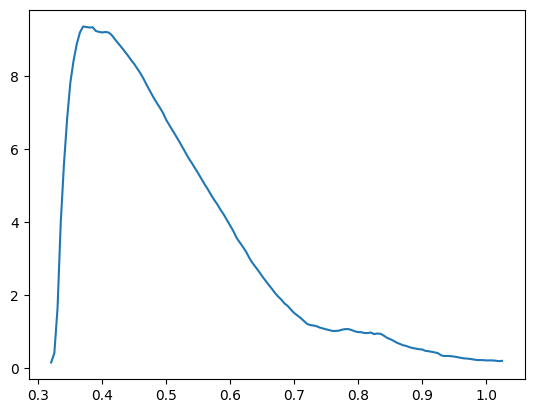

In [ ]:
# Assuming you want to plot the interpolated value of F for T = 0.3
t_value = 0.3
interpolated_value = df_inter['F'][df_inter['T'] == t_value]
print(interpolated_value)
print(t_value)

# Plot the interpolated value
plt.plot(df_inter['T'], df_inter['F'])
plt.scatter([t_value], interpolated_value, color='red')  # Highlight the specific T value
plt.xlabel("T")
plt.ylabel("F")
plt.title("Interpolated F vs T")
plt.show()

In [ ]:
df_inter['F'][df_inter['T'] == 0.3]

Series([], Name: F, dtype: float64)

In [ ]:
def norm_crop(df, te, tp):
    df = df.copy()
    df = df[df['T'] >= te]
    bg = df['F'].mean()
    print(bg)
    df_n = df.copy()
    df_n['F'] -= bg
    print(df_n)

    print(df_n[(df_n['T'] < tp) & (df_n['F'] < 1)])
    print(df_n[(df_n['T'] > tp) & (df_n['F'] < 1)])
    st = df_n[(df_n['T'] < tp) & (df_n['F'] < 1)].index[-1]
    en = df_n[(df_n['T'] > tp) & (df_n['F'] < 1)].index[0]
    df_crop = df.iloc[st:en]
    return df_crop

In [ ]:
df

,T,F1,F2,F
0,0.000,-0.463081,0.054672,0.408409
1,0.005,-0.458885,0.042053,0.416832
2,0.010,-0.465172,0.046257,0.418915
3,0.015,-0.458885,0.044159,0.414726
4,0.020,-0.465172,0.033646,0.431526
...,...,...,...,...
1375,6.875,-0.180199,-0.008415,0.188614
1376,6.880,-0.178108,-0.012619,0.190727
1377,6.885,-0.182297,-0.012619,0.194916
1378,6.890,-0.182297,-0.006310,0.188606


In [ ]:
df_crop = norm_crop(df, 2, 0.7)

0.17938433274693877
          T        F1        F2         F
400   2.000 -0.150864 -0.039955  0.011434
401   2.005 -0.152962 -0.035751  0.009329
402   2.010 -0.155060  0.000000 -0.024325
403   2.015 -0.152962 -0.014725 -0.011698
404   2.020 -0.146675 -0.023132 -0.009577
...     ...       ...       ...       ...
1375  6.875 -0.180199 -0.008415  0.009230
1376  6.880 -0.178108 -0.012619  0.011343
1377  6.885 -0.182297 -0.012619  0.015531
1378  6.890 -0.182297 -0.006310  0.009222
1379  6.895 -0.178108 -0.006310  0.005033

[980 rows x 4 columns]
Empty DataFrame
Columns: [T, F1, F2, F]
Index: []
          T        F1        F2         F
400   2.000 -0.150864 -0.039955  0.011434
401   2.005 -0.152962 -0.035751  0.009329
402   2.010 -0.155060  0.000000 -0.024325
403   2.015 -0.152962 -0.014725 -0.011698
404   2.020 -0.146675 -0.023132 -0.009577
...     ...       ...       ...       ...
1375  6.875 -0.180199 -0.008415  0.009230
1376  6.880 -0.178108 -0.012619  0.011343
1377  6.885 -0.182297 -0

IndexError: index -1 is out of bounds for axis 0 with size 0

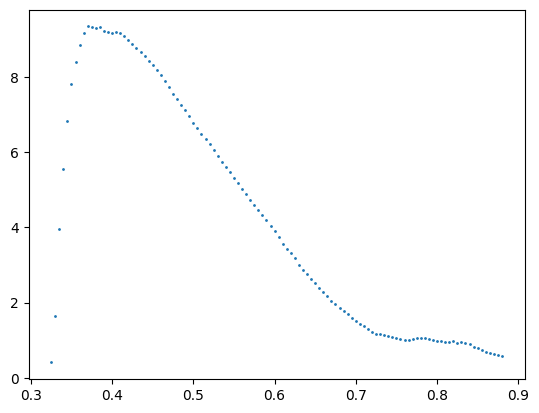

In [ ]:
plt.scatter(df_crop['T'], df_crop['F'], s=1)
plt.show()